In [1]:
"""CLASSIFICATION SVM & NAIVE BAYES"""

import numpy as np
import pandas as pd
import sqlite3


In [5]:
df=pd.read_csv('dataPREDICT_NER.csv')
df

,Content,Label
0,pasal uu tpks udah dikatakan keterangan korban...,1
1,rismawidi< I-PER/>ono,4
2,memiliki anggapan teroris ditangkap memiliki k...,4
3,menggandeng kemen< I-PER/>ag mengevaluasi pond...,4
4,bully diserang dipojokan arah hina cinta dapat...,4
...,...,...
1676,capres imigran < I-LOC/>yaman merubah ulama bu...,3
1677,yaudah biarin yaudah senyumin yaudah lupain ya...,3
1678,sapiens iman beriman menemukan tuhan delusiona...,2
1679,munafiknya politisasi politik perusak pancasil...,2


In [3]:
"""TF-IDF"""

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['Content'], df['Label'], test_size=0.2, random_state=7)

df_train = pd.DataFrame()
df_train['Content'] = x_train
df_train['Label'] = y_train

df_test= pd.DataFrame()
df_test['Content'] = x_test
df_test['Label'] = y_test

df_train

df_test

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf vectorizer
tfidf=TfidfVectorizer()
tfidf.fit(df['Content'].values.astype('U'))
#hitung tf-idf setiap kata pada data training
x_train_tfidf = tfidf.transform(df_train['Content'].values.astype('U'))
#hitung tf-idf setiap kata pada data testing
x_test_tfidf = tfidf.transform(df_test['Content'].values.astype('U'))

df_train.to_csv('tweet-train02.csv', index=False)
df_train.to_csv('tweet-test02.csv', index=False)

tfidf

print(x_train_tfidf)

print(x_test_tfidf)

print(x_train_tfidf.shape)
print(x_test_tfidf.shape)

print(tfidf.vocabulary_)

  (0, 5303)	0.7951451847495653
  (0, 500)	0.5266194232031519
  (0, 291)	0.3006927306649749
  (1, 6430)	0.26909986063312624
  (1, 6361)	0.33187323322722806
  (1, 5725)	0.33187323322722806
  (1, 5568)	0.1985448649501628
  (1, 5145)	0.33187323322722806
  (1, 4810)	0.3502332677329014
  (1, 3956)	0.3502332677329014
  (1, 2515)	0.2935063857668485
  (1, 2380)	0.25073982612745294
  (1, 1384)	0.3502332677329014
  (1, 249)	0.20183951158811597
  (2, 6188)	0.8243478399483836
  (2, 2145)	0.49490650915373474
  (2, 291)	0.2748057240482779
  (3, 5669)	0.28432963146996726
  (3, 4873)	0.08978903120672517
  (3, 4054)	0.33203039040031707
  (3, 3852)	0.32150833904071496
  (3, 3607)	0.23547402953000038
  (3, 2392)	0.6112848343068065
  (3, 615)	0.3647148672344486
  (3, 587)	0.3455956739307923
  :	:
  (1343, 6518)	0.18915245907278436
  (1343, 6194)	0.12738477888691824
  (1343, 6055)	0.18915245907278436
  (1343, 5939)	0.18915245907278436
  (1343, 5660)	0.17220127412778113
  (1343, 5419)	0.18915245907278436
  (

In [4]:
# metode SVM

from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics


SVM = SVC(kernel='linear')
SVM.fit(x_train_tfidf,y_train)

SVC(kernel='linear')

The Accuracy is 91.39%
[[112   0   0   4]
 [  1  36   0  10]
 [  2   1  38   5]
 [  1   3   2 122]]
The classification report is:
              precision    recall  f1-score   support

           1       0.97      0.97      0.97       116
           2       0.90      0.77      0.83        47
           3       0.95      0.83      0.88        46
           4       0.87      0.95      0.91       128

    accuracy                           0.91       337
   macro avg       0.92      0.88      0.90       337
weighted avg       0.92      0.91      0.91       337



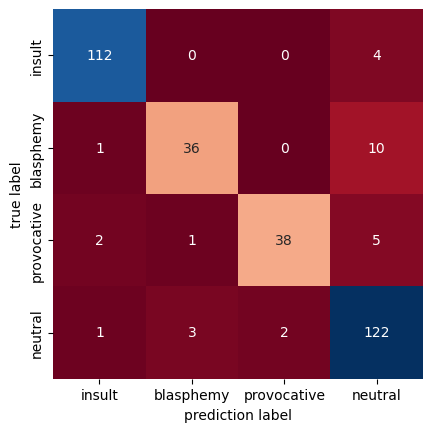

In [5]:
# data test svm

from sklearn.metrics import accuracy_score

predictions_SVM = SVM.predict(x_test_tfidf)
test_prediction = pd.DataFrame()
test_prediction['Content'] = x_test
test_prediction['Label'] = predictions_SVM
model1 = metrics.accuracy_score(y_test, predictions_SVM)
print("The Accuracy is",str('{:04.2f}'.format(model1*100))+'%')

from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test, predictions_SVM)
print(matrix)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(matrix, square= True, annot= True, cbar= False, cmap='RdBu', xticklabels=['insult','blasphemy','provocative','neutral'], yticklabels= ['insult','blasphemy','provocative','neutral'], fmt= 'g')
plt.xlabel('prediction label')
plt.ylabel('true label')

from sklearn.metrics import classification_report

print ("The classification report is:") 
print (classification_report(y_test, predictions_SVM))

test_prediction

test_prediction.to_csv('testpredict02.csv', index=False)


The Accuracy is 97.69%
[[426   1   0   5]
 [  0 239   1   1]
 [  5   0 217   4]
 [  0   6   8 431]]
The classification report is:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       432
           2       0.97      0.99      0.98       241
           3       0.96      0.96      0.96       226
           4       0.98      0.97      0.97       445

    accuracy                           0.98      1344
   macro avg       0.97      0.98      0.98      1344
weighted avg       0.98      0.98      0.98      1344



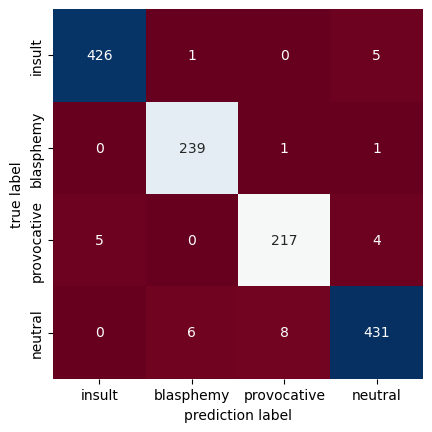

In [6]:
# data train svm

from sklearn.metrics import accuracy_score

predictions_SVM1 = SVM.predict(x_train_tfidf)
train_prediction1 = pd.DataFrame()
train_prediction1['Content'] = x_train
train_prediction1['Label'] = predictions_SVM1
model2 = metrics.accuracy_score(y_train, predictions_SVM1)
print("The Accuracy is",str('{:04.2f}'.format(model2*100))+'%')

from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_train, predictions_SVM1)
print(matrix)

import seaborn as sns
sns.heatmap(matrix, square= True, annot= True, cbar= False, cmap='RdBu', xticklabels=['insult','blasphemy','provocative','neutral'], yticklabels= ['insult','blasphemy','provocative','neutral'], fmt= 'g')
plt.xlabel('prediction label')
plt.ylabel('true label')

from sklearn.metrics import classification_report

print ("The classification report is:") 
print (classification_report(y_train, predictions_SVM1))

train_prediction1

train_prediction1.to_csv('trainpredict02.csv', index=False)


The Accuracy is 78.04%
[[116   0   0   0]
 [  6  25   0  16]
 [ 12   0  13  21]
 [ 18   0   1 109]]
The classification report is:
              precision    recall  f1-score   support

           1       0.76      1.00      0.87       116
           2       1.00      0.53      0.69        47
           3       0.93      0.28      0.43        46
           4       0.75      0.85      0.80       128

    accuracy                           0.78       337
   macro avg       0.86      0.67      0.70       337
weighted avg       0.81      0.78      0.76       337



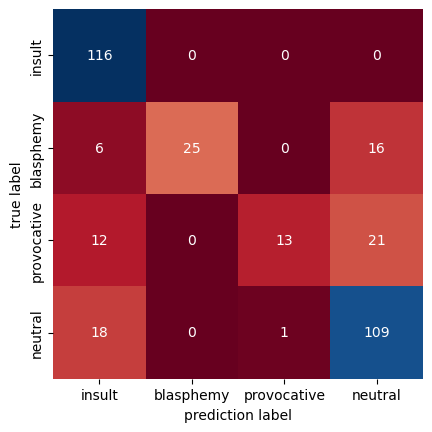

In [7]:
# metode naive bayes

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report 
bayes = MultinomialNB()
##tahapan untuk menjalankan training
bayes.fit(x_train_tfidf,y_train)

#menjalankan data testing
nb_result = bayes.predict(x_test_tfidf)
from sklearn import metrics
model = metrics.accuracy_score(y_test, nb_result)
print("The Accuracy is",str('{:04.2f}'.format(model*100))+'%')

from sklearn.metrics import confusion_matrix
matrix2= confusion_matrix(y_test, nb_result)
print(matrix2)

import seaborn as sns
sns.heatmap(matrix2, square= True, annot= True, cbar= False, cmap='RdBu', xticklabels=['insult','blasphemy','provocative','neutral'], yticklabels= ['insult','blasphemy','provocative','neutral'], fmt= 'g')
plt.xlabel('prediction label')
plt.ylabel('true label')

from sklearn.metrics import classification_report
print("The classification report is:")
print(classification_report(y_test, nb_result))

In [8]:
# Result

Tweet = input('Input Tweet : ')
result = bayes.predict(tfidf.transform([Tweet]))
if(result == [1]):
  result = 'This tweet is an insult'
elif(result==[2]):
  result = 'This tweet is a blasphemous speech'
elif(result==[3]):
  result = 'This tweet is a provocative'
elif(result==[4]):
  result = 'This tweet is a neutral'
else:
  result = 'This tweet is unidenified'

result

Input Tweet : @jokowi Jgn jadi anjing nya Amrik! Datang cuman meronrong hasil bumi Indonesia!


'This tweet is an insult'

In [11]:
Tweet = input('Input Tweet : ')
result = bayes.predict(tfidf.transform([Tweet]))
if(result == [1]):
  result = 'This tweet is an insult'
elif(result==[2]):
  result = 'This tweet is a blasphemous speech'
elif(result==[3]):
  result = 'This tweet is a provocative'
elif(result==[4]):
  result = 'This tweet is a neutral'
else:
  result = 'This tweet is unidenified'

result

Input Tweet : Kelakuan iblis yg bertopengkan agama


'This tweet is a blasphemous speech'

In [14]:
Tweet = input('Input Tweet : ')
result = bayes.predict(tfidf.transform([Tweet]))
if(result == [1]):
  result = 'This tweet is an insult'
elif(result==[2]):
  result = 'This tweet is a blasphemous speech'
elif(result==[3]):
  result = 'This tweet is a provocative'
elif(result==[4]):
  result = 'This tweet is a neutral'
else:
  result = 'This tweet is unidenified'

result

Input Tweet : ini kalimat berita


'This tweet is a neutral'

In [10]:
import sklearn.externals as extjoblib
import joblib
filename='svm.sav'
joblib.dump(SVM,filename)

labelfile='vectorizer.sav'
joblib.dump(tfidf,labelfile)

loaded_model = joblib.load('svm.sav')
mlb = joblib.load('vectorizer.sav')

x_tes = []
for i in  (x_test):
    x_tes.append('.'.join(str()))
categdf=pd.DataFrame({
                'x_test' : x_test, 
                 'y_true': y_test,
                 'y_pred': predictions_SVM })


print(categdf.count())
categdf['correct'] = np.where(categdf['y_true']==categdf['y_pred'], 'true', 'false')
display(categdf.style.highlight_max(color='burlywood', subset=pd.IndexSlice[:, ['correct']], axis=0))

categdf.to_csv('categdf.csv', index=False)

predict_score = df['Label'].value_counts()
predict_score
print('\n\n')

x_test    337
y_true    337
y_pred    337
dtype: int64


,x_test,y_true,y_pred,correct
1073,intel kadal gurun,2,2,true
377,anjing buka aib twitter,1,1,true
1317,semangat ayo loyo,4,4,true
885,pegl rasis orang tidak malu begitu semenjak masuk pemerintahan serba rugi nombok suku marga tidak ngingetin begitu hiiiiiiiii,2,4,false
328,pdhl anjing,1,1,true
229,ramai fifa < I-PER/>ganjar < I-PER/>pranowo menpan rb ubah regulasi batasan usia pns,4,4,true
504,ngantuk banget anjing,1,1,true
1496,sope privasi dipost disosmed bodoh,1,1,true
1513,rosiade buzzer,3,3,true
671,lelaki bodoh,1,1,true


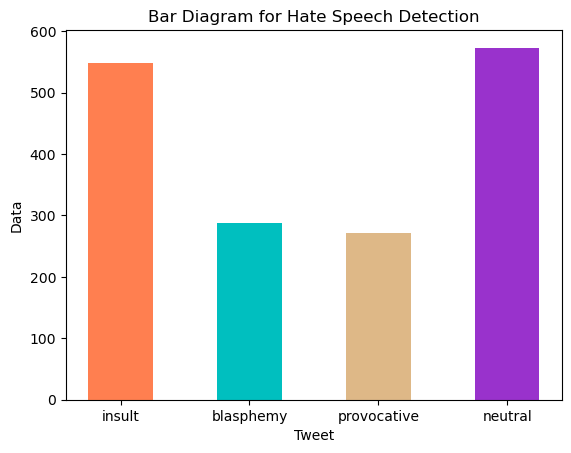

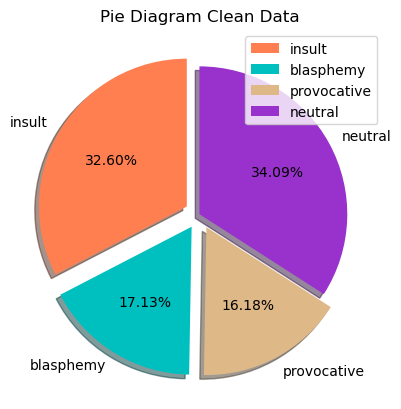

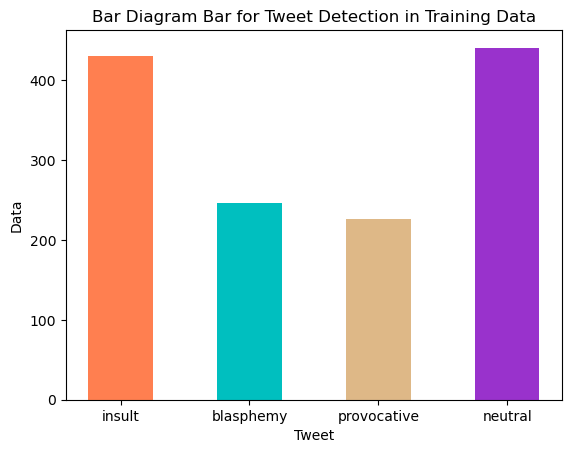

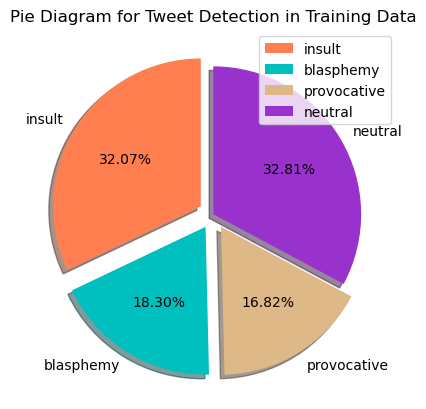

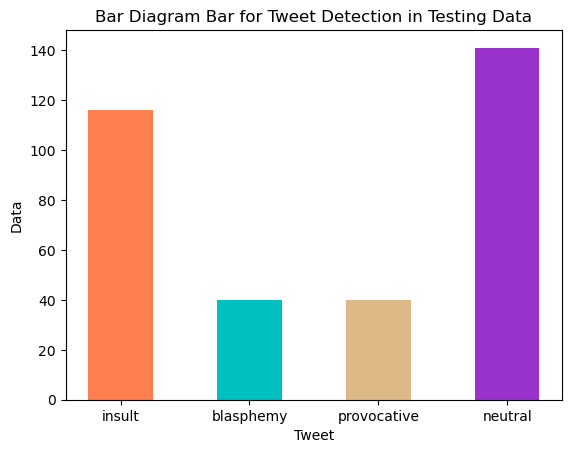

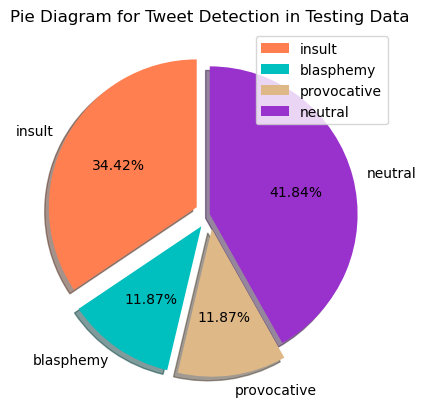

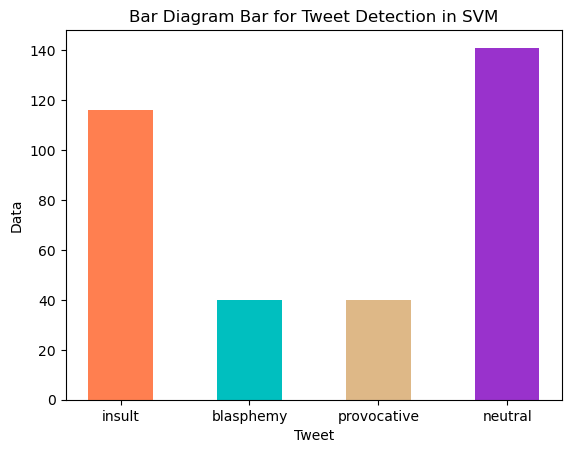

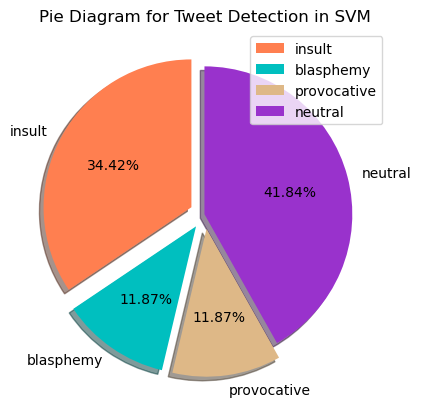

In [13]:
import matplotlib.pyplot as plt

labels = ['insult','blasphemy','provocative','neutral']
Category1 = [548,288,272,573]
plt.bar(labels, Category1, tick_label=labels, width=0.5, color=['coral', 'c', 'burlywood', 'darkorchid'])
plt.xlabel('Tweet')
plt.ylabel('Data')
plt.title('Bar Diagram for Hate Speech Detection')
plt.savefig("bar_02.png")
plt.show()
print('\n\n')

color = ['coral', 'c', 'burlywood', 'darkorchid']
plt.pie(Category1, labels=labels, colors=color,startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0.1, 0.1, 0))
plt.title('Pie Diagram Clean Data')
plt.legend()
plt.savefig("pie_02.png")
plt.show()
print('\n\n')

predict_score = df_train['Label'].value_counts()
predict_score

labels = ['insult','blasphemy','provocative','neutral']
Category2 = [431,246,226,441]
plt.bar(labels, Category2, tick_label=labels, width=0.5, color=['coral', 'c', 'burlywood', 'darkorchid'])
plt.xlabel('Tweet')
plt.ylabel('Data')
plt.title('Bar Diagram Bar for Tweet Detection in Training Data')
plt.savefig("bar1_02.png")
plt.show()
print('\n\n')

color = ['coral', 'c', 'burlywood', 'darkorchid']
plt.pie(Category2, labels=labels, colors=color,startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0.1, 0.1, 0))
plt.title('Pie Diagram for Tweet Detection in Training Data')
plt.legend()
plt.savefig("pie1_02.png")
plt.show()
print('\n\n')

predict_score = df_test['Label'].value_counts()
predict_score

labels = ['insult','blasphemy','provocative','neutral']
Category3 = [116,40,40,141]
plt.bar(labels, Category3, tick_label=labels, width=0.5, color=['coral', 'c', 'burlywood', 'darkorchid'])
plt.xlabel('Tweet')
plt.ylabel('Data')
plt.title('Bar Diagram Bar for Tweet Detection in Testing Data')
plt.savefig("bar2_02.png")
plt.show()
print('\n\n')

color = ['coral', 'c', 'burlywood', 'darkorchid']
plt.pie(Category3, labels=labels, colors=color,startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0.1, 0.1, 0))
plt.title('Pie Diagram for Tweet Detection in Testing Data')
plt.legend()
plt.savefig("pie2_02.png")
plt.show()
print('\n\n')

predict_score = test_prediction['Label'].value_counts()
predict_score

labels = ['insult','blasphemy','provocative','neutral']
Category4 = [116,40,40,141]
plt.bar(labels, Category4, tick_label=labels, width=0.5, color=['coral', 'c', 'burlywood', 'darkorchid'])
plt.xlabel('Tweet')
plt.ylabel('Data')
plt.title('Bar Diagram Bar for Tweet Detection in SVM')
plt.savefig("bar3_02.png")
plt.show()
print('\n\n')

color = ['coral', 'c', 'burlywood', 'darkorchid']
plt.pie(Category4, labels=labels, colors=color,startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0.1, 0.1, 0))
plt.title('Pie Diagram for Tweet Detection in SVM')
plt.legend()
plt.savefig("pie3_02.png")
plt.show()